<a href="https://colab.research.google.com/github/mehrnazeraeisi/Climate-Model-Simulation-40966/blob/main/Climate_Model_Simulation_40966_KnnClassification_Modification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# [1] Prioritize features based on single-feature KNN accuracy
def prioritize_features_by_accuracy(X, y, features):
    feature_scores = []
    knn = KNeighborsClassifier()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D shape
        knn.fit(X_feature, y)
        y_pred = knn.predict(X_feature)
        acc = accuracy_score(y, y_pred)
        feature_scores.append((feature, acc))

    df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
    return df_scores.sort_values(by='Accuracy', ascending=False)

In [ ]:
# [2] Safe accuracy computation for selected feature groups
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)


In [ ]:
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.9 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=af90195e2f7dfa6f132c0d2a6bf403ff9859b3a97dfd2f7f2ebf0f160b02e103
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [30]:
# Climate Model Simulation
# شبیه‌سازی آب‌وهوا (دوتایی)
import openml
import pandas as pd

dataset = openml.datasets.get_dataset(40966)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# 🔧 افزودن target به dataframe کامل (مثل خواندن فایل CSV)
data['rating'] = y_data  # فرض می‌گیریم نام ستون هدف "rating" باشه برای یکسان بودن با مثال شما

print(data.shape)
# حذف سطرهای حاوی NaN
data = data.dropna()

# 🔍 نمایش اطلاعات
print(data.columns)
print(data.head())
print(data.shape)

# 🎯 جدا کردن ویژگی‌ها و برچسب‌ها (مطابق ساختار شما)
X_data = data.drop('rating', axis=1)
y_data = data['rating']
data_features = X_data.columns


(1080, 78)
Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'rating'],
      dtype='object')
    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    

In [31]:
# [4] Prioritize all features by single-feature accuracy
feature_scores = prioritize_features_by_accuracy(X_data, y_data, data_features)
print("🔎 Feature-wise Accuracy Ranking:")
print(feature_scores)


🔎 Feature-wise Accuracy Ranking:
       Feature  Accuracy
10      pERK_N  0.583333
32      SOD1_N  0.583333
46     pPKCG_N  0.572464
20      BRAF_N  0.557971
0     DYRK1A_N  0.539855
..         ...       ...
3        NR1_N  0.407609
52       BAX_N  0.403986
24       ERK_N  0.403986
63     PSD95_N  0.402174
31  Bcatenin_N  0.371377

[77 rows x 2 columns]


In [42]:
# [5] Group features based on accuracy thresholds
strong_features = feature_scores[feature_scores['Accuracy'] > 0.58]['Feature'].tolist()
medium_features_1 = feature_scores[feature_scores['Accuracy'] > 0.57]['Feature'].tolist()
medium_features_2 = feature_scores[feature_scores['Accuracy'] > 0.55]['Feature'].tolist()
medium_features_3 = feature_scores[feature_scores['Accuracy'] > 0.53]['Feature'].tolist()
medium_features_4 = feature_scores[feature_scores['Accuracy'] > 0.52]['Feature'].tolist()
medium_features_5 = feature_scores[feature_scores['Accuracy'] > 0.50]['Feature'].tolist()
medium_features_6 = feature_scores[feature_scores['Accuracy'] > 0.48]['Feature'].tolist()
medium_features_7 = feature_scores[feature_scores['Accuracy'] > 0.46]['Feature'].tolist()
medium_features_8 = feature_scores[feature_scores['Accuracy'] > 0.42]['Feature'].tolist()
medium_features_9 = feature_scores[feature_scores['Accuracy'] > 0.41]['Feature'].tolist()
medium_features_10 = feature_scores[feature_scores['Accuracy'] > 0.4]['Feature'].tolist()




In [43]:
# [6] Evaluate grouped features using multi-feature KNN accuracy
groups = [list(data_features), strong_features, medium_features_1, medium_features_2, medium_features_3, medium_features_4, medium_features_5, medium_features_6, medium_features_7, medium_features_8, medium_features_9, medium_features_10]

acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

# [7] Create summary table
summary_df = pd.DataFrame({
    'Feature Group': ['All Features', 'Strong Features', 'medium_features_1', 'medium_features_2', 'medium_features_3', 'medium_features_4', 'medium_features_5', 'medium_features_6', 'medium_features_7', 'medium_features_8', 'medium_features_9', 'medium_features_10'],
    'Accuracy': acc_scores})

print("\n📊 Grouped Feature Performance Summary:")
print(summary_df)


📊 Grouped Feature Performance Summary:
         Feature Group  Accuracy
0         All Features  0.994565
1      Strong Features  0.742754
2    medium_features_1  0.907609
3    medium_features_2  0.916667
4    medium_features_3  0.976449
5    medium_features_4  0.976449
6    medium_features_5  0.989130
7    medium_features_6  0.989130
8    medium_features_7  0.992754
9    medium_features_8  0.996377
10   medium_features_9  0.996377
11  medium_features_10  0.994565


In [44]:
# [8] Final evaluation function: repeats KNN classification and plots accuracy over repeats
def evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9,  all_features, test_size, n_repeats):
    accuracy_scores = {
        "all_features": [],
        "medium_features_9": []
    }

    feature_groups = {
        "all_features": all_features,
        "medium_features_9": medium_features_9,
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            k = int(np.sqrt(len(X_train)))
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train[group_features], y_train)
            y_pred = knn.predict(X_test[group_features])
            acc = accuracy_score(y_test, y_pred)
            accuracy_scores[group_name].append(acc)

    # Plotting accuracy per repeat
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(10, 5))
    for group_name, acc_list in accuracy_scores.items():
        plt.plot(x, acc_list, label=f"{group_name.replace('_', ' ').title()}", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy Over Repeats')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

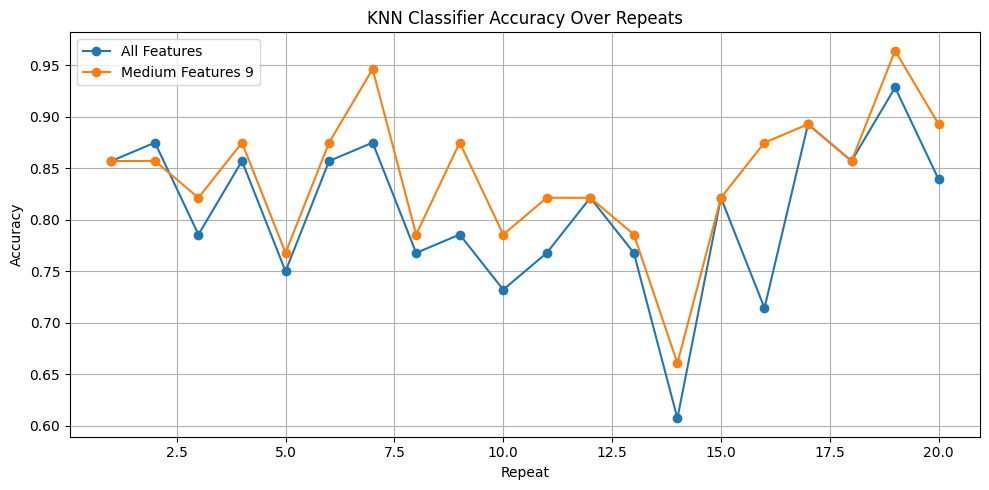

In [45]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9,  data_features, test_size=0.10, n_repeats=20)



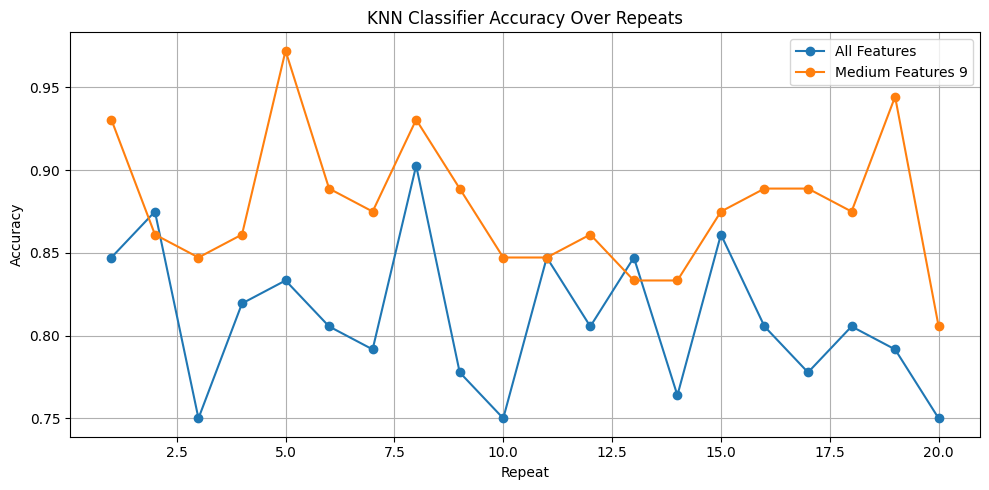

In [46]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9,  data_features, test_size=0.13, n_repeats=20)


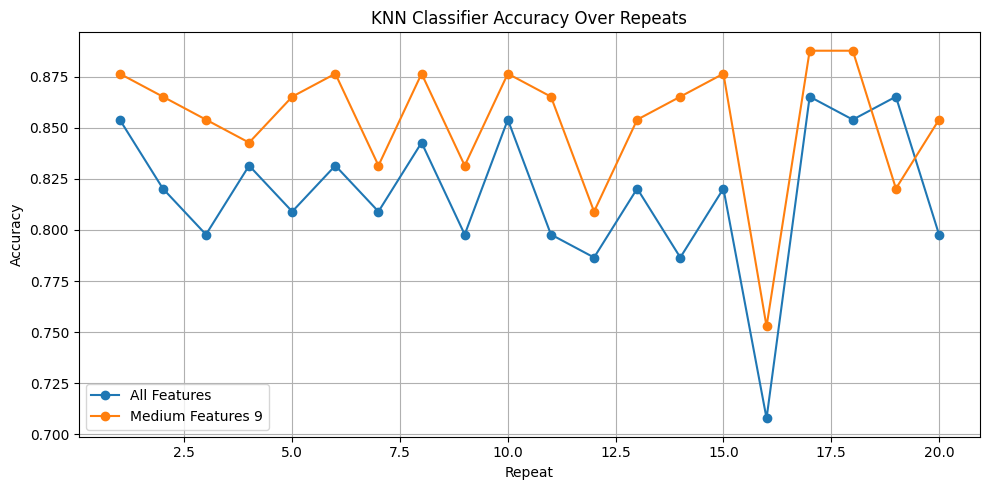

In [47]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9, data_features, test_size=0.16, n_repeats=20)


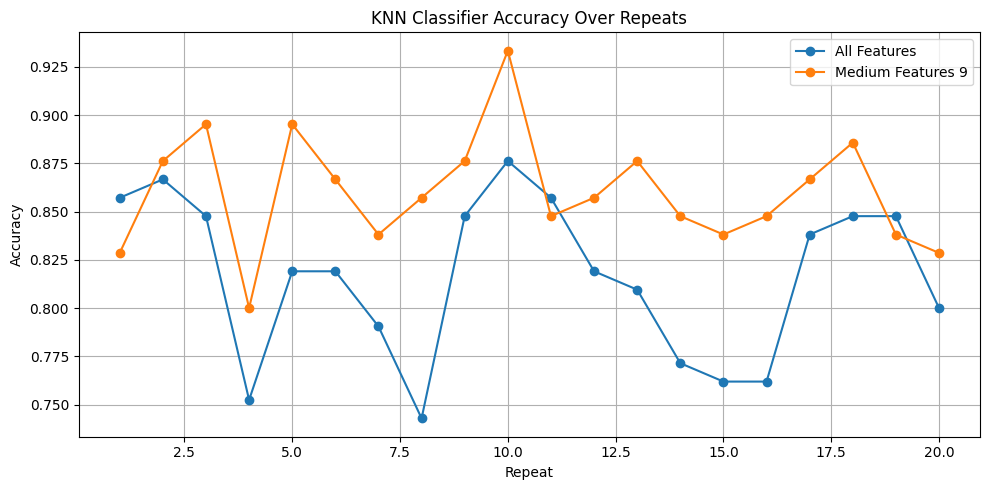

In [48]:
# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9, data_features, test_size=0.19, n_repeats=20)


(1080, 78)
Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'rating'],
      dtype='object')
    DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    

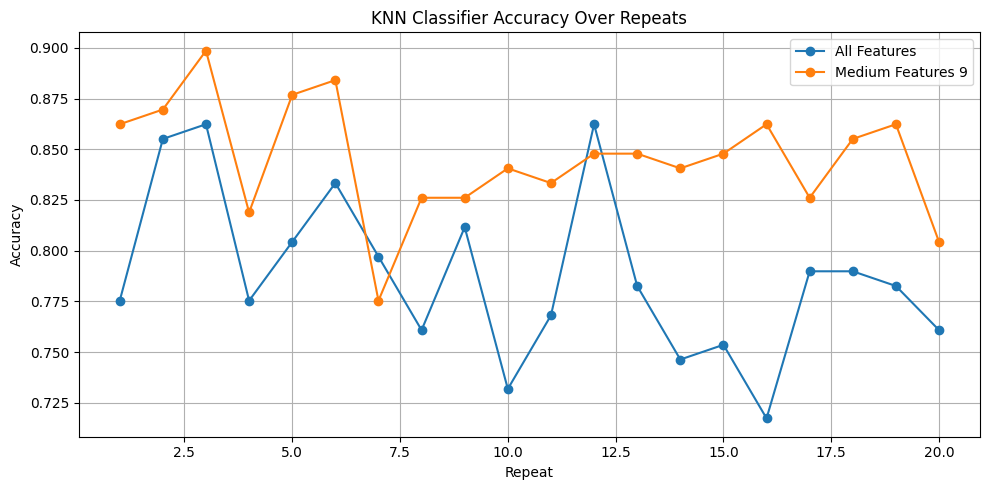

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# [1] Prioritize features based on single-feature KNN accuracy
def prioritize_features_by_accuracy(X, y, features):
    feature_scores = []
    knn = KNeighborsClassifier()

    for feature in features:
        X_feature = X[[feature]]  # Ensure 2D shape
        knn.fit(X_feature, y)
        y_pred = knn.predict(X_feature)
        acc = accuracy_score(y, y_pred)
        feature_scores.append((feature, acc))

    df_scores = pd.DataFrame(feature_scores, columns=['Feature', 'Accuracy'])
    return df_scores.sort_values(by='Accuracy', ascending=False)

# [2] Safe accuracy computation for selected feature groups
def knn_accuracy(X, y, selected_features):
    if not selected_features:
        return np.nan
    model = KNeighborsClassifier()
    X_subset = X[selected_features]
    model.fit(X_subset, y)
    y_pred = model.predict(X_subset)
    return accuracy_score(y, y_pred)

# بارگذاری فایل
# Climate Model Simulation
# شبیه‌سازی آب‌وهوا (دوتایی)
import openml
import pandas as pd

dataset = openml.datasets.get_dataset(40966)
data, y_data, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# 🔧 افزودن target به dataframe کامل (مثل خواندن فایل CSV)
data['rating'] = y_data  # فرض می‌گیریم نام ستون هدف "rating" باشه برای یکسان بودن با مثال شما

print(data.shape)
# حذف سطرهای حاوی NaN
data = data.dropna()

# 🔍 نمایش اطلاعات
print(data.columns)
print(data.head())
print(data.shape)

# 🎯 جدا کردن ویژگی‌ها و برچسب‌ها (مطابق ساختار شما)
X_data = data.drop('rating', axis=1)
y_data = data['rating']
data_features = X_data.columns




# [4] Prioritize all features by single-feature accuracy
feature_scores = prioritize_features_by_accuracy(X_data, y_data, data_features)
print("🔎 Feature-wise Accuracy Ranking:")
print(feature_scores)


# [5] Group features based on accuracy thresholds
strong_features = feature_scores[feature_scores['Accuracy'] > 0.58]['Feature'].tolist()
medium_features_1 = feature_scores[feature_scores['Accuracy'] > 0.57]['Feature'].tolist()
medium_features_2 = feature_scores[feature_scores['Accuracy'] > 0.55]['Feature'].tolist()
medium_features_3 = feature_scores[feature_scores['Accuracy'] > 0.53]['Feature'].tolist()
medium_features_4 = feature_scores[feature_scores['Accuracy'] > 0.52]['Feature'].tolist()
medium_features_5 = feature_scores[feature_scores['Accuracy'] > 0.50]['Feature'].tolist()
medium_features_6 = feature_scores[feature_scores['Accuracy'] > 0.48]['Feature'].tolist()
medium_features_7 = feature_scores[feature_scores['Accuracy'] > 0.46]['Feature'].tolist()
medium_features_8 = feature_scores[feature_scores['Accuracy'] > 0.42]['Feature'].tolist()
medium_features_9 = feature_scores[feature_scores['Accuracy'] > 0.41]['Feature'].tolist()
medium_features_10 = feature_scores[feature_scores['Accuracy'] > 0.4]['Feature'].tolist()


# [6] Evaluate grouped features using multi-feature KNN accuracy
groups = [list(data_features), strong_features, medium_features_1, medium_features_2, medium_features_3, medium_features_4, medium_features_5, medium_features_6, medium_features_7, medium_features_8, medium_features_9, medium_features_10]

acc_scores = [knn_accuracy(X_data, y_data, group) for group in groups]

# [7] Create summary table
summary_df = pd.DataFrame({
    'Feature Group': ['All Features', 'Strong Features', 'medium_features_1', 'medium_features_2', 'medium_features_3', 'medium_features_4', 'medium_features_5', 'medium_features_6', 'medium_features_7', 'medium_features_8', 'medium_features_9', 'medium_features_10'],
    'Accuracy': acc_scores})

print("\n📊 Grouped Feature Performance Summary:")
print(summary_df)

# [8] Final evaluation function: repeats KNN classification and plots accuracy over repeats
def evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9,  data_features, test_size, n_repeats):
    accuracy_scores = {
        "all_features": [],
        "medium_features_9": []

    }

    feature_groups = {
        "all_features": data_features,
        "medium_features_9": medium_features_9
    }

    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size)

        for group_name, group_features in feature_groups.items():
            k = int(np.sqrt(len(X_train)))
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train[group_features], y_train)
            y_pred = knn.predict(X_test[group_features])
            acc = accuracy_score(y_test, y_pred)
            accuracy_scores[group_name].append(acc)

    # Plotting accuracy per repeat
    x = np.arange(1, n_repeats + 1)
    plt.figure(figsize=(10, 5))
    for group_name, acc_list in accuracy_scores.items():
        plt.plot(x, acc_list, label=f"{group_name.replace('_', ' ').title()}", marker='o')
    plt.xlabel('Repeat')
    plt.ylabel('Accuracy')
    plt.title('KNN Classifier Accuracy Over Repeats')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# [9] Run final evaluation
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9, data_features, test_size=0.25, n_repeats=20)


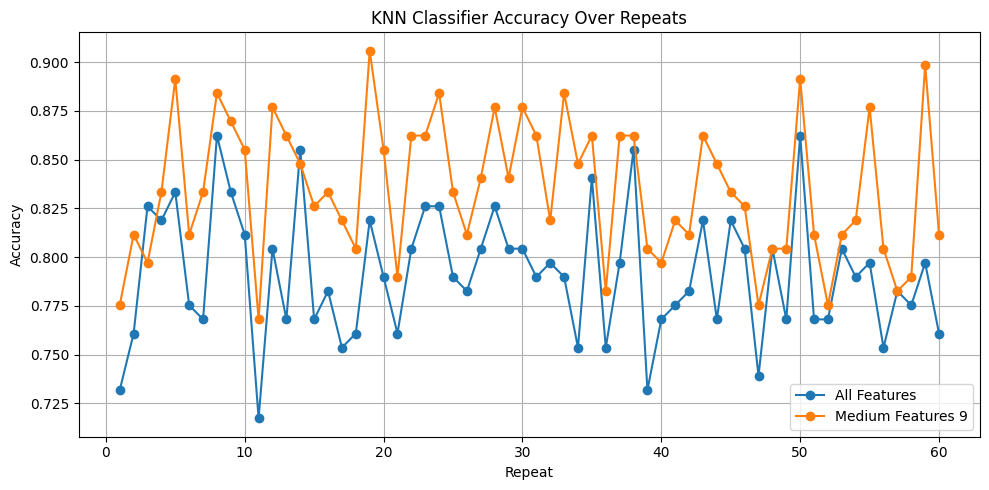

In [50]:
evaluate_knn_accuracy_by_groups(X_data, y_data, medium_features_9, data_features, test_size=0.25, n_repeats=60)
